# Assignment08
## Name : Yeon-Jee Jung
## Student ID : 20142052
## Git URL : https://github.com/YeonjeeJung/assignment08

# Import packages for plotting graphs and manipulating data :

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Setting for input data :
## Open input files

In [2]:
file_data_train = "mnist_train.csv"
file_data_test = "mnist_test.csv"

h_data_train = open(file_data_train, 'r')
h_data_test = open(file_data_test, 'r')

data_train = h_data_train.readlines()
data_test = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row = 28 # height of the image
size_col = 28 # width of the image

num_train = len(data_train) # number of training images
num_test = len(data_test) # number of testing images

## Define normalization function
Make input data to be in $\left[0, 1 \right]$

In [3]:
#
# normalize the values of the input data to be [0, 1]
#

def normalize(data):
    data_normalized = (data  - min(data)) / (max(data) - min(data))
    return data_normalized

## Make train and test data matrix with input file
In MNIST, 1 image size is $28\times28$. In matrix, one column represents one image. So train data matrix size is $784\times num\_train$, and test data matrix size is $784\times num\_test$.

$matrix = \begin{bmatrix}f_1(x_1) & f_1(x_2) & \cdots & f_1(x_{num}) \\f_2(x_1) & f_2(x_2) & \cdots & f_2(x_{num}) \\\vdots & \vdots & & \vdots \\f_{784}(x_1) & f_{784}(x_2) & \cdots & f_{784}(x_{num}) \\\end{bmatrix}$

If the label is '0', then final label is '1'(true). If the label is not '0', then final label is '-1'(false). 

In [4]:
#
# make a matrix each column of which represents an images in a vector form
#

list_image_train = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train = np.empty(num_train, dtype=int)

list_image_test = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test = np.empty(num_test, dtype=int)

count = 0

for line in data_train:
    line_data = line.split(',')
    label = line_data[0]
    
    if label == '0':
        label = 1
    else:
        label = -1
        
    im_vector = np.asfarray(line_data[1:])
    im_vector = normalize(im_vector)
    
    list_label_train[count] = label
    list_image_train[:, count] = im_vector
    
    count += 1
    
count = 0

for line in data_test:
    line_data = line.split(',')
    label = line_data[0]
    
    if label == '0':
        label = 1
    else:
        label = -1
        
    im_vector = np.asfarray(line_data[1:])
    im_vector = normalize(im_vector)
    
    list_label_test[count] = label
    list_image_test[:, count] = im_vector
    
    count += 1

## Show 150 train images

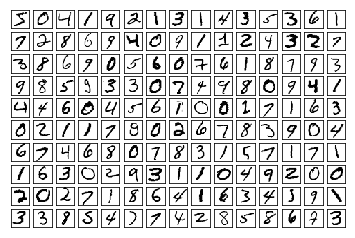

In [5]:
#
# plot first 150 images out of 10,000
#

f1 = plt.figure(1)

for i in range(150):
    label = list_label_train[i]
    im_vector = list_image_train[:, i]
    im_matrix = im_vector.reshape((size_row, size_col))
    
    plt.subplot(10, 15, i+1)
    #plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

## Show average image of train images for 0 and others

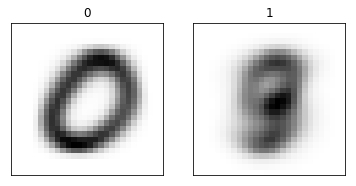

In [6]:
#
# plot the average image of all the images for 0 and others
#

f2 = plt.figure(2)

im_average = np.zeros((size_row * size_col, 2), dtype=float)
im_count = np.zeros(2, dtype=int)

for i in range(num_train):
    if list_label_train[i] == -1:
        im_average[:, 1] += list_image_train[:, i]
        im_count[1] += 1
    else:
        im_average[:, 0] += list_image_train[:, i]
        im_count[0] += 1
    
for i in range(2):
    im_average[:, i] /= im_count[i]
    
    plt.subplot(1, 2, i+1)
    plt.title(i)
    plt.imshow(
        im_average[:, i].reshape((size_row, size_col)), 
        cmap='Greys', interpolation='None'
    )
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

# Define functions to solve Least_square problem :
We will find $\begin{bmatrix} s_1 \\ s_2 \\ \vdots \\ s_{784} \end{bmatrix}$ that minimizes $\begin{Vmatrix}\begin{bmatrix}f_1(x_1) & f_2(x_1) &\cdots &f_{784}(x_1) \\f_1(x_2) & f_2(x_2) &\cdots &f_{784}(x_2) \\\vdots & \vdots &&\vdots \\f_1(x_n) & f_2(x_n) &\cdots&f_{784}(x_n)\end{bmatrix}\cdot\begin{bmatrix} s_1 \\ s_2 \\ \vdots \\ s_{784} \end{bmatrix} - \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}\end{Vmatrix}$.

## Define norm function
This function returns norm of a vector.

In [7]:
def norm(vector):
    sum = 0
    for i in range(len(vector)):
        sum += vector[i]**2
    return np.sqrt(sum)

## Define proj function
This function returns projection of vectors.

In [8]:
def proj(e, a):
    return (np.matmul(e.T, a) / np.matmul(e.T, e))*e

## Define computeQR function
This function returns the Q, R matrix from input matrix. Q is the orthonormal matrix, and R is upper triangle matrix.

In [9]:
def computeQR(matrix):
    Q = np.zeros([matrix.shape[0], matrix.shape[1]])
    R = np.zeros([matrix.shape[1], matrix.shape[1]])
    U = np.zeros([matrix.shape[1], matrix.shape[0]])
    
    for i in range(matrix.shape[1]):
        sum = 0
        Ai = matrix[:,i]
        for j in range(i):
            sum += proj(U[j], Ai)
        U[i] = Ai - sum
        
    for i in range(matrix.shape[1]):
        for j in range(matrix.shape[0]):
            Q[j][i] = U[i][j]/norm(U[i])
            
    for i in range(matrix.shape[0]):
        for j in range(i, matrix.shape[1]):
            R[i][j] = np.dot(Q[:,i], matrix[:,j])
    return Q, R

## Define findX function
This function returns x, from Q, R, and b. Q, R is from computeQR function, that makes A by multiplication. So this function can find x that satisfy least-square problem such that $A\cdot x = Q\cdot R\cdot x = b$.

In [10]:
def findX(Q, R, b):
    Rsol = np.matmul(Q.T, b)
    sol = np.zeros(Rsol.shape)
    for i in reversed(range(Rsol.shape[0])):
        a = Rsol[i]
        for j in reversed(range(i+1, Rsol.shape[0])):
            a -= sol[j]*R[i][j]
        if R[i][i] == 0:
            sol[i] = 0
        else:
            sol[i] = a / R[i][i]
    return sol

# Solve Least-square problem for classification:
## Find $Q, R$, and $S$.
To find Q, R, the computeQR function is too slow. So I used same function in numpy that is faster.

In [11]:
#Q, R = computeQR(list_image_train.T)
Q, R = np.linalg.qr(list_image_train.T)
sol = findX(Q, R, list_label_train)

## Predict the test dataset, and evaluate the score.
TP is for True Positive, TN is for True Negative, FP is for False Positive, FN is for False Negative.

In [12]:
pred = np.sign(np.matmul(list_image_test.T, sol))

list_TF = [None for i in range(num_test)]
for i in range(num_test):
    if pred[i] == 1.0 and list_label_test[i] == 1:
        list_TF[i] = 'TP'
    elif pred[i] == -1.0 and list_label_test[i] == 1:
        list_TF[i] = 'FN'
    elif pred[i] == -1.0 and list_label_test[i] == -1:
        list_TF[i] = 'TN'
    elif pred[i] == 1.0 and list_label_test[i] == -1:
        list_TF[i] = 'FP'
        
print("(TP, FP, TN, FN) : ("
      +str(list_TF.count('TP'))+", "
      +str(list_TF.count('FP'))+", "
      +str(list_TF.count('TN'))+", "
      +str(list_TF.count('FN'))+")"
     )

(TP, FP, TN, FN) : (917, 60, 8960, 63)


## Plot the average image of TP, TN, FP, FN.

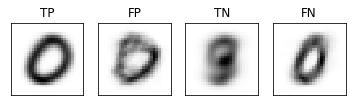

In [13]:
#
# plot the average image of test images for TP, TN, FP, FN
#

f3 = plt.figure(3)

im_average = np.zeros((size_row * size_col, 4), dtype=float)
im_count = np.zeros(4, dtype=int)
im_title = ['TP', 'FP', 'TN', 'FN']

for i in range(num_test):
    if list_TF[i] == 'TP':
        im_average[:, 0] += list_image_test[:, i]
        im_count[0] += 1
    elif list_TF[i] == 'FP':
        im_average[:, 1] += list_image_test[:, i]
        im_count[1] += 1
    elif list_TF[i] == 'TN':
        im_average[:, 2] += list_image_test[:, i]
        im_count[2] += 1
    elif list_TF[i] == 'FN':
        im_average[:, 3] += list_image_test[:, i]
        im_count[3] += 1
    
for i in range(4):
    im_average[:, i] /= im_count[i]
    
    plt.subplot(1, 4, i+1)
    plt.title(im_title[i])
    plt.imshow(
        im_average[:, i].reshape((size_row, size_col)), 
        cmap='Greys', interpolation='None'
    )
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()